In [6]:

library(tidyverse)
library(magrittr)

In [7]:
source("../R/alg/cma-es-csa.R")
source("../R/alg/cma-es-expth.R")
source("../R/alg/cma-es-tpat.R")
source("../R/eval-funcs.R")
source("../R/plot-funcs.R")
options(repr.plot.width=20, repr.plot.height=10)

In [24]:
get_sigma = function(algs) {
    algs %>% purrr::map_dfr(function(alg) {
        data.frame(
            sigma = alg$diagnostic$sigma,
            bval = alg$diagnostic$bestVal
        ) %>% dplyr::mutate(label = alg$label)
    }) %>%
    dplyr::group_by(label) %>%
    dplyr::mutate(t = 1:dplyr::n()) %>%
    dplyr::ungroup()
}
plot_sigma = function(df, tmax = 500) {
    df %>%
    ggplot2::ggplot() +
    ggplot2::geom_line(aes(x = t, y = log10(sigma), col = label)) + 
    ggplot2::theme(
        axis.title = ggplot2::element_text(size = 15, face = "bold"),
        axis.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.title = ggplot2::element_text(size = 15, face = "bold"),
    ) + 
    xlim(0, tmax)
}
plot_bval = function(df, tmax = 500) {
    df %>%
    ggplot2::ggplot() +
    ggplot2::geom_line(aes(x = t, y = log10(abs(bval)), col = label)) + 
    ggplot2::theme(
        axis.title = ggplot2::element_text(size = 15, face = "bold"),
        axis.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.title = ggplot2::element_text(size = 15, face = "bold"),
    ) + 
    xlim(0, tmax)
}
run_exp = function(params, alg, func, N) {
    x0 = rep(100, N)
    params %>% furrr::future_map_dfr(function(param) {
        result = 
            alg(x0, fn = function(x) func(x), lower = -100, upper = 100, control = list(d_param = param, p_target = 0.5))
        t = length(result$diagnostic$sigma)
        data.frame(
            t = 1:t,
            sigma = result$diagnostic$sigma,
            label = result$label
        )
    })
}

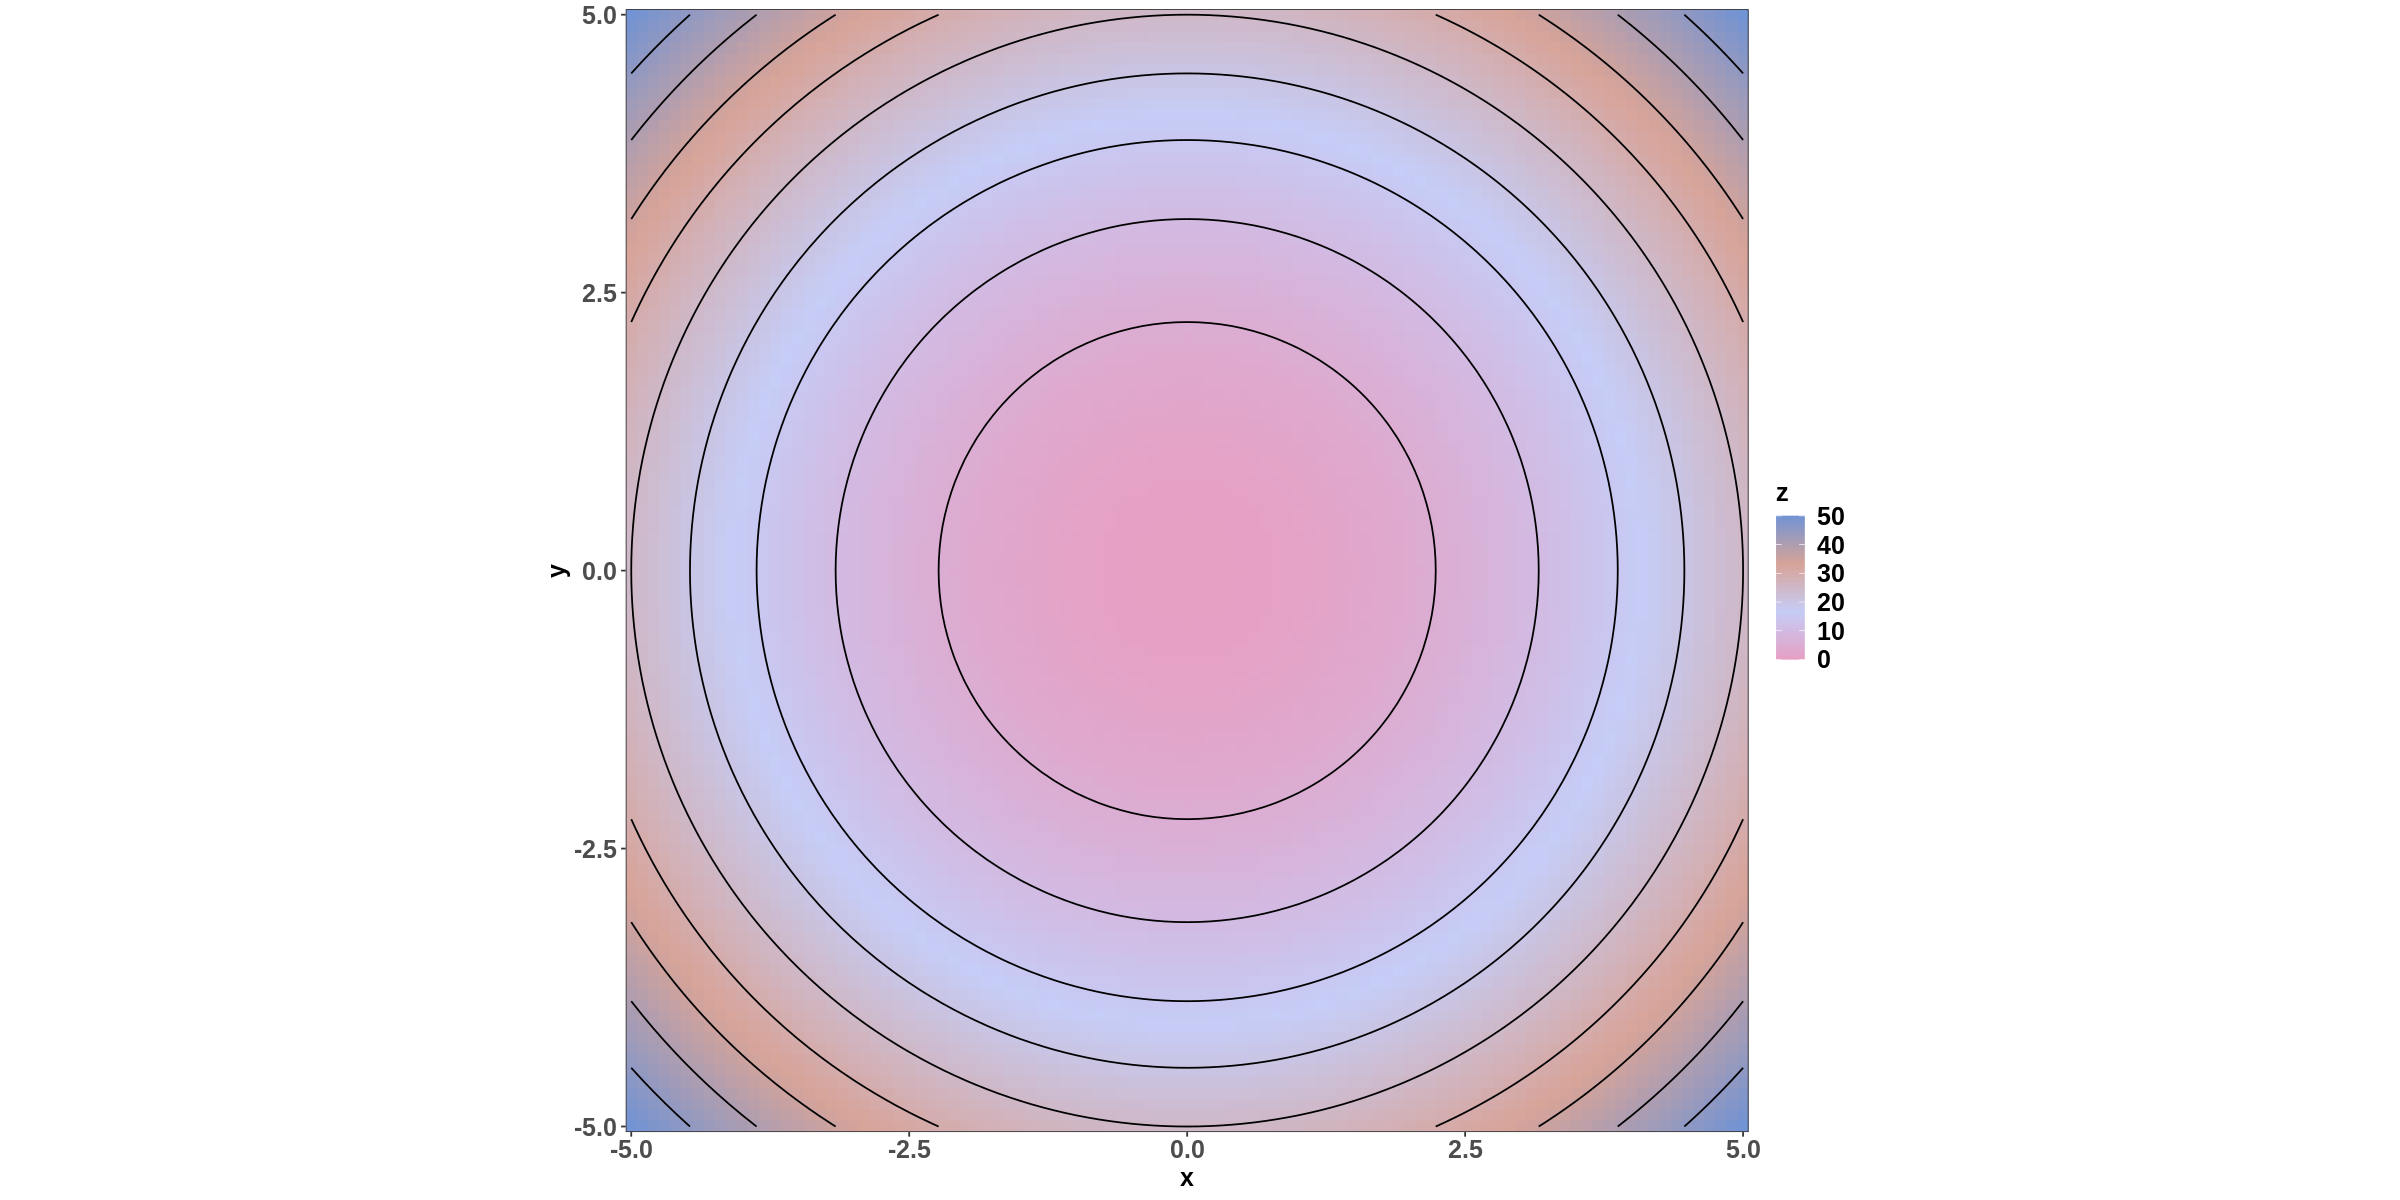

In [9]:
contour_plot(sphere_func, c(-5, 5), c(-5, 5))

## X_0 = (100, ..., 100)

In [10]:
x0 = rep(100, 10)
N = 10
maxiter = round((10000*N)/(4*N))

In [11]:
csa = 
    cma_es_csa(x0, fn = function(x) sphere_func(x), lower = -100, upper = 100)

In [20]:
ppmf = 
    cma_es_ppmf(x0, fn = function(x) sphere_func(x), lower = -100, upper = 100, control = list(p_target = 0.5))

In [21]:
sigma_df = 
    list(csa, ppmf) %>% 
    get_sigma()

Warning message:
“Removed 2155 row(s) containing missing values (geom_path).”
Warning message:
“Removed 2155 row(s) containing missing values (geom_path).”


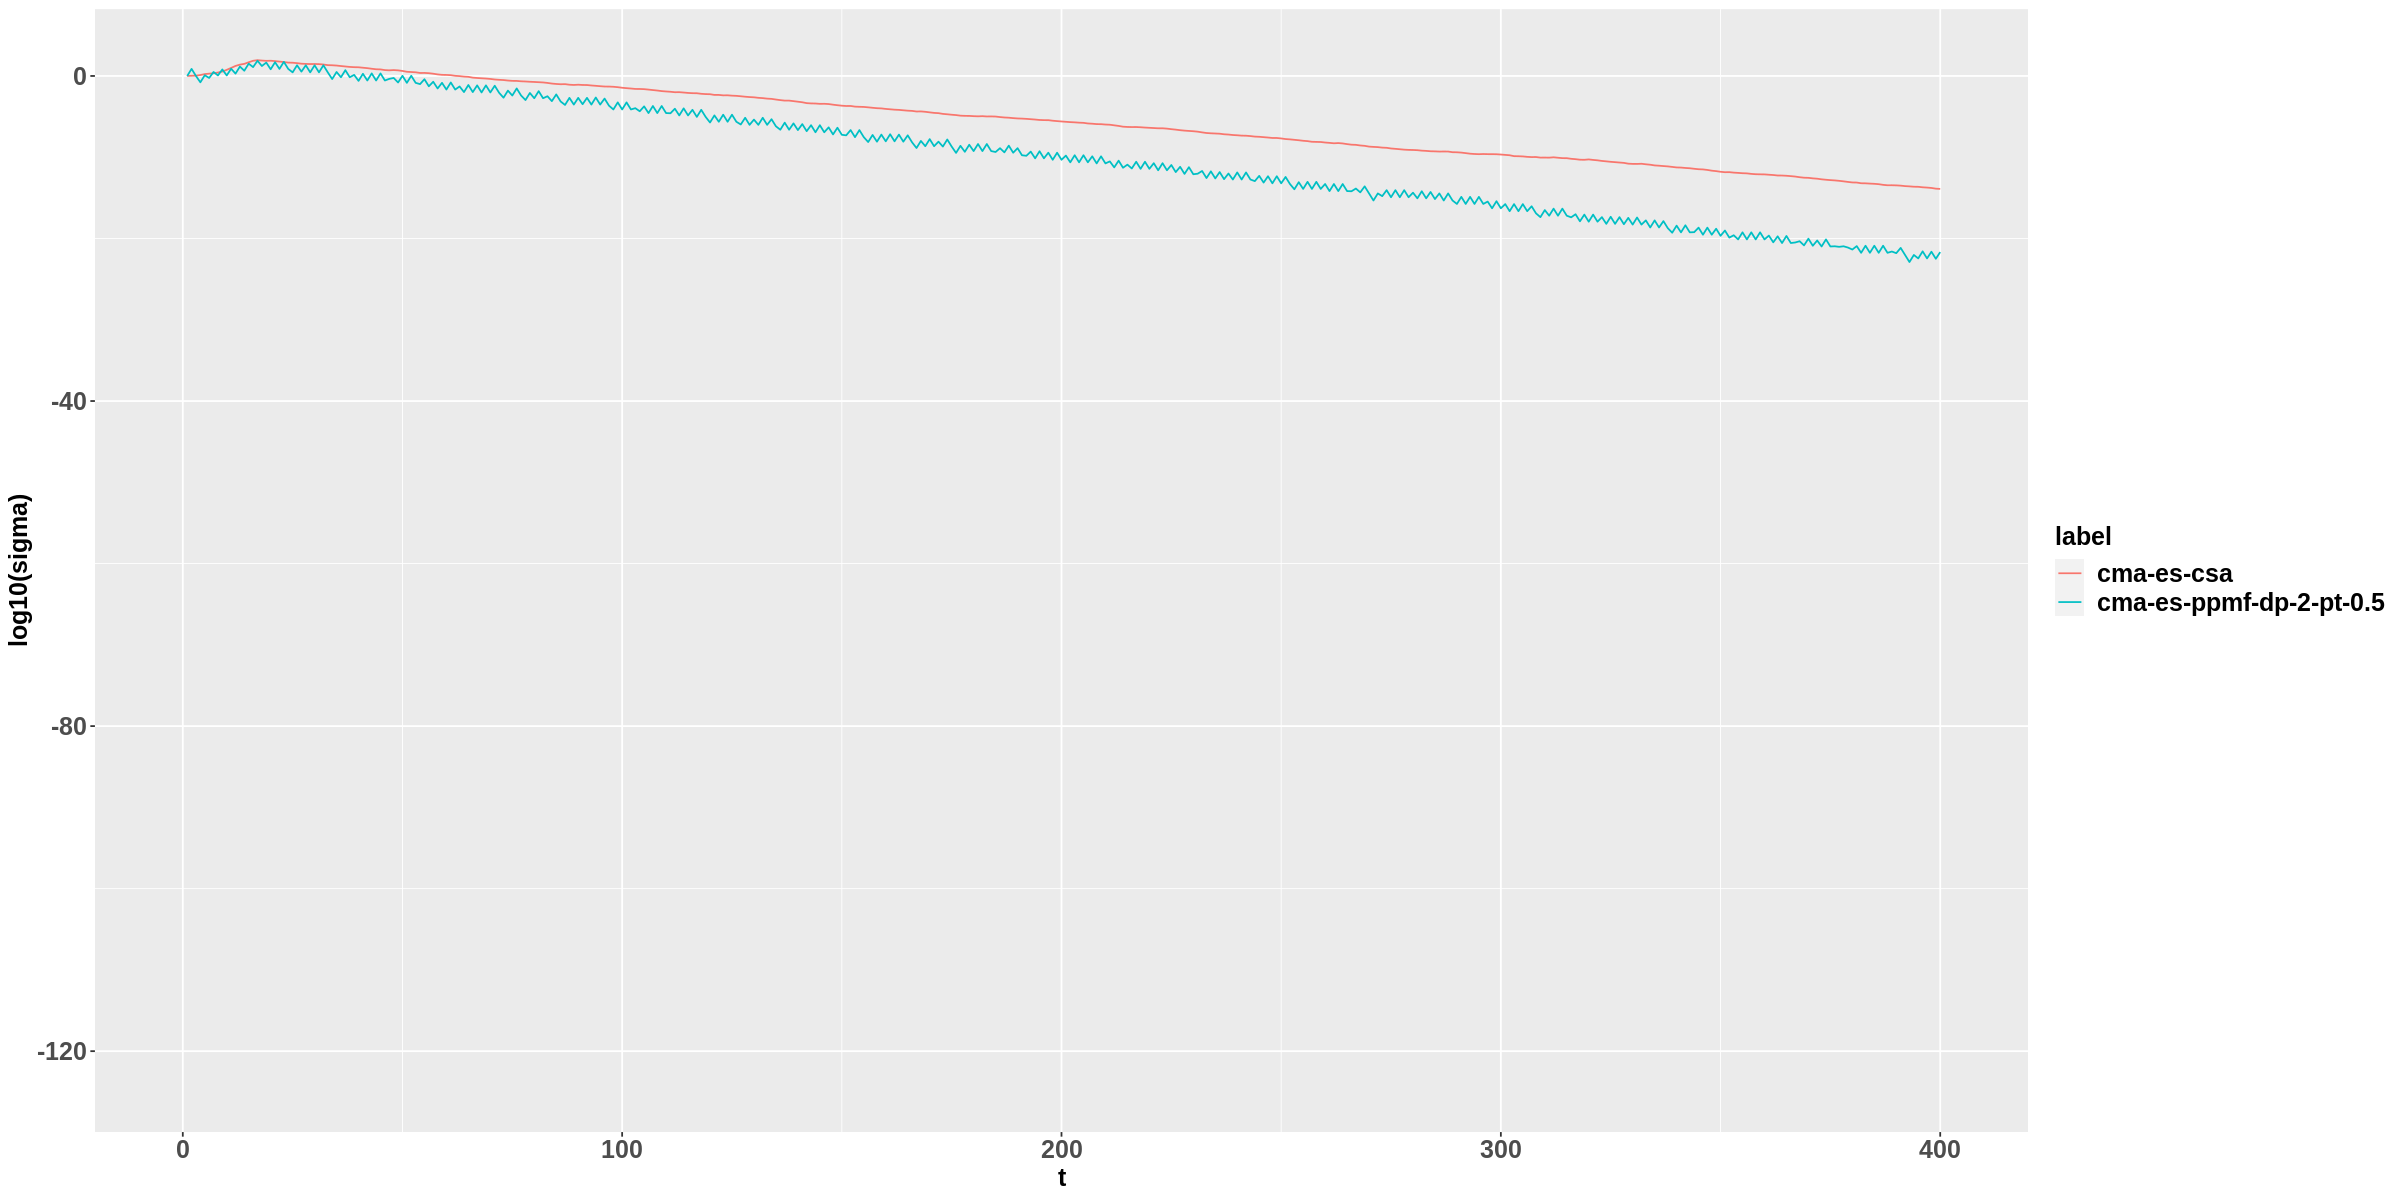

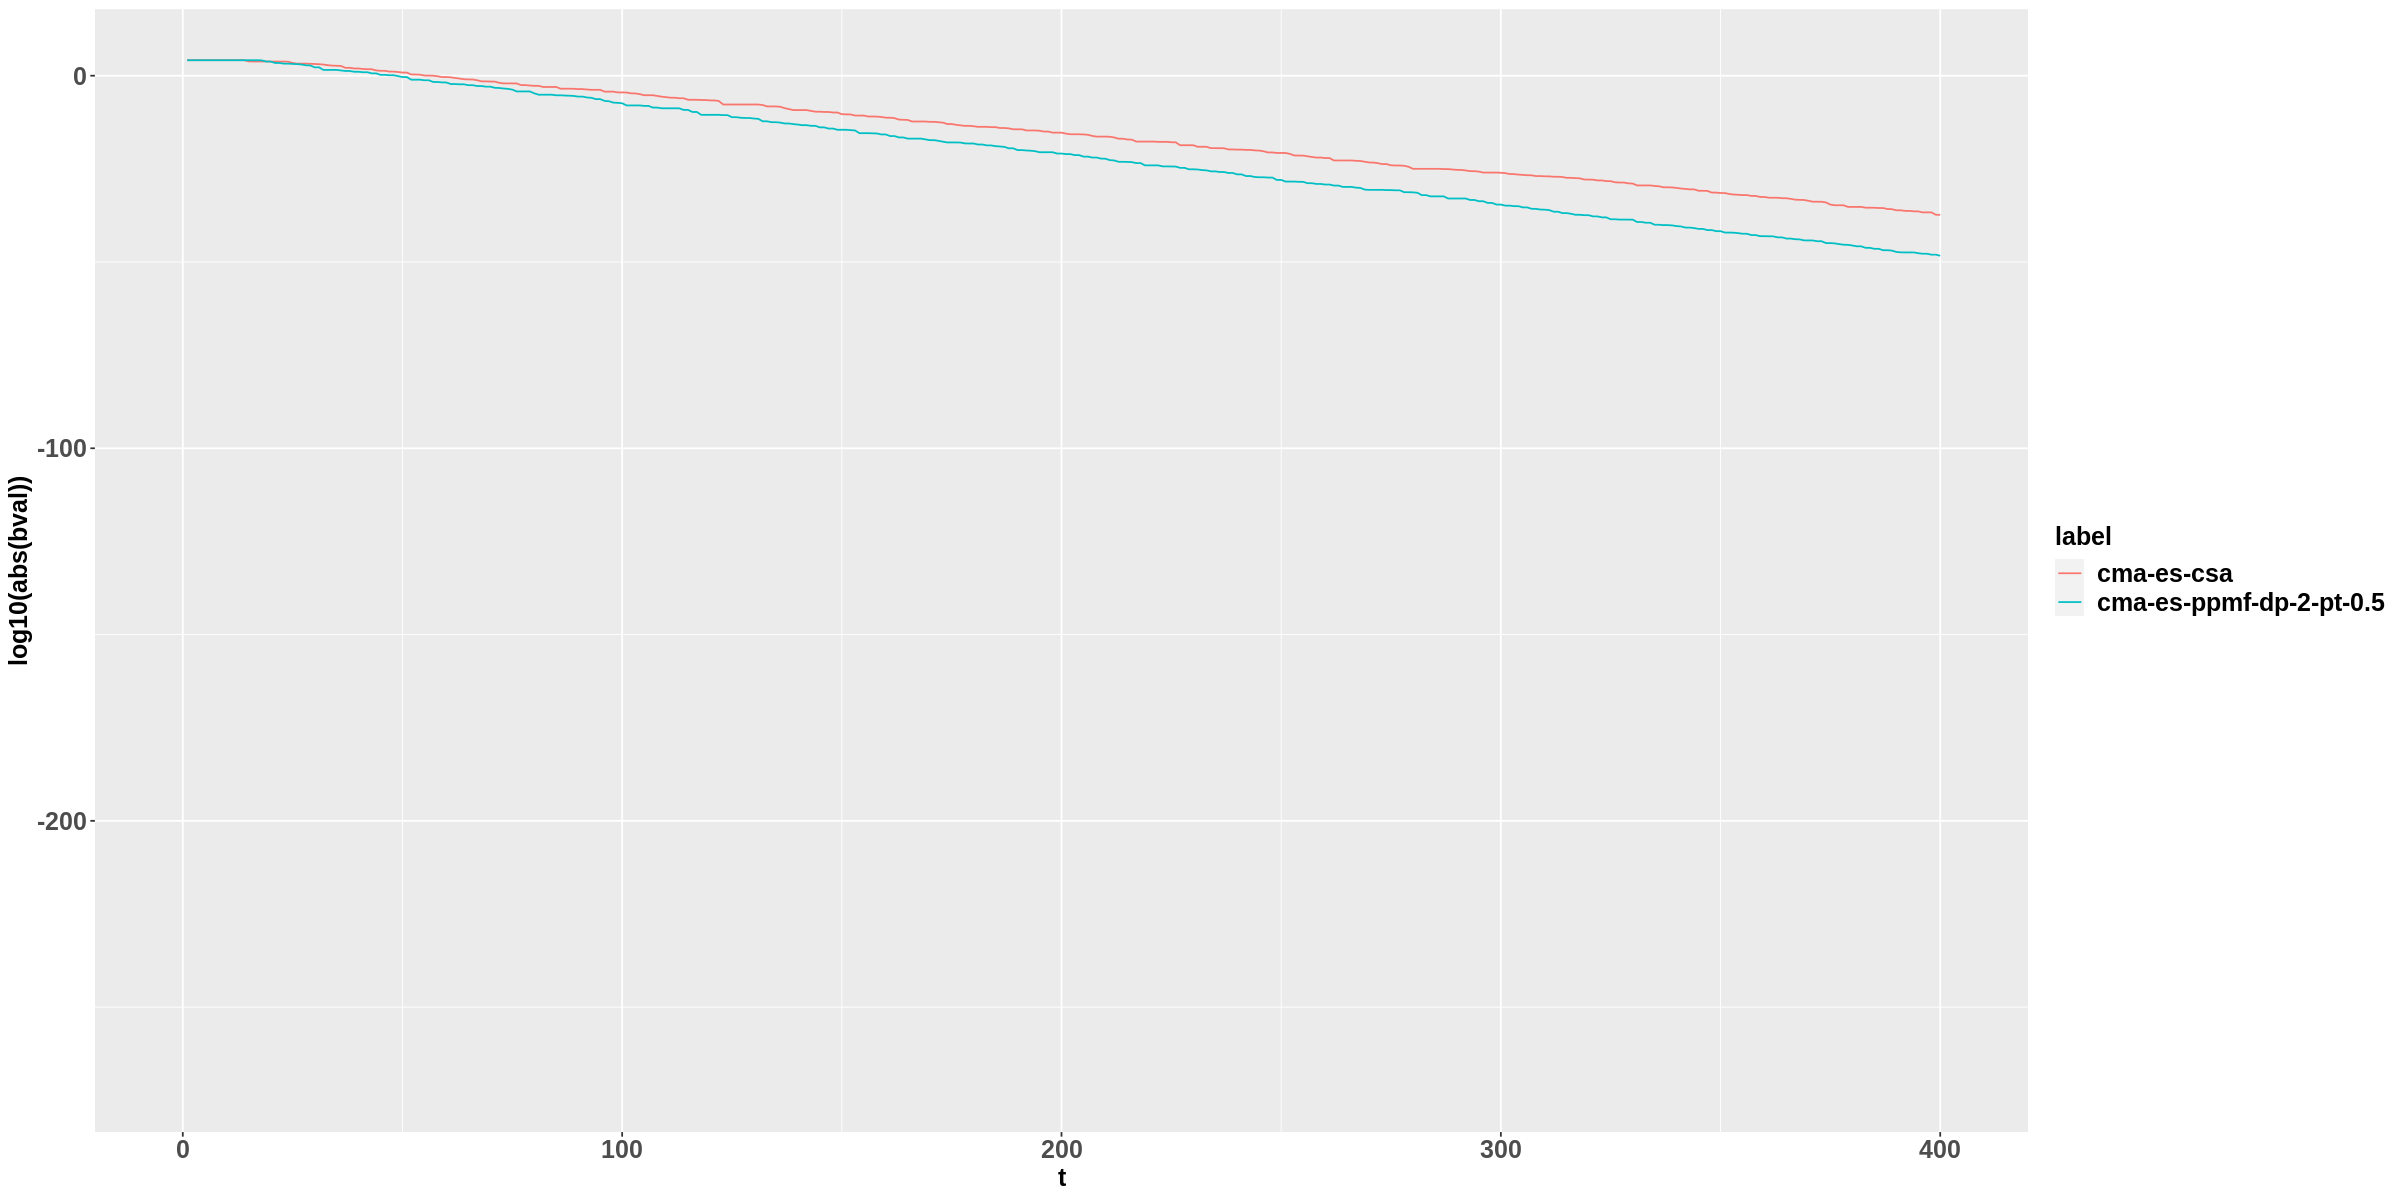

In [22]:
sigma_df %>% 
    plot_sigma(400)
sigma_df %>% 
    plot_bval(400)